In [76]:
import numpy as np

# Decision stump used as weak classifier
class DecisionStump:
    def __init__(self):
        self.polarity = 1
        self.feature_idx = None
        self.threshold = None
        self.alpha = None

    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X[:, self.feature_idx]
        predictions = np.ones(n_samples)
        if self.polarity == 1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column > self.threshold] = -1

        return predictions

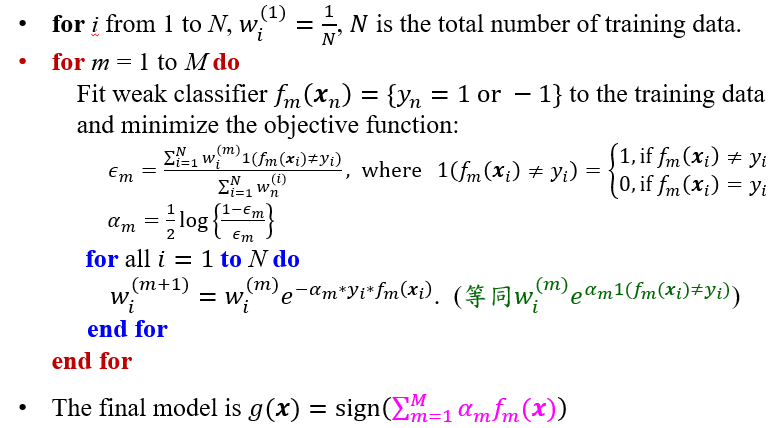

In [77]:
class Adaboost:
    def __init__(self, n_clf=5):
        self.n_clf = n_clf
        self.clfs = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights to 1/N
        w = np.full(n_samples, (1 / n_samples))

        self.clfs = []

        # Iterate through classifiers
        for _ in range(self.n_clf):
            clf = DecisionStump()
            min_error = float("inf")

            # greedy search to find best threshold and feature
            for feature_i in range(n_features):
                X_column = X[:, feature_i]
                thresholds = np.unique(X_column)

                for threshold in thresholds:
                    # predict with polarity 1
                    p = 1
                    predictions = np.ones(n_samples)
                    predictions[X_column < threshold] = -1

                    # Error = sum of weights of misclassified samples
                    misclassified = w[y != predictions]
                    error = sum(misclassified)

                    if error > 0.5:
                        error = 1 - error
                        p = -1

                    # store the best configuration
                    if error < min_error:
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_idx = feature_i
                        min_error = error

            # calculate alpha
            EPS = 1e-10
            clf.alpha = 0.5 * np.log((1.0 - min_error + EPS) / (min_error + EPS))

            # calculate predictions and update weights
            predictions = clf.predict(X)

            w *= np.exp(-clf.alpha * y * predictions)
            # Normalize to one
            w /= np.sum(w)

            # Save classifier
            self.clfs.append(clf)

    def predict(self, X):
        clf_preds = [clf.alpha * clf.predict(X) for clf in self.clfs]
        y_pred = np.sum(clf_preds, axis=0)
        y_pred = np.sign(y_pred)

        return y_pred

In [78]:
# Testing
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

data = datasets.load_breast_cancer()
X, y = data.data, data.target

y[y == 0] = -1

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=5)

# Adaboost classification with 5 weak classifiers
clf = Adaboost(n_clf=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9736842105263158


In [51]:
# The followings are tests

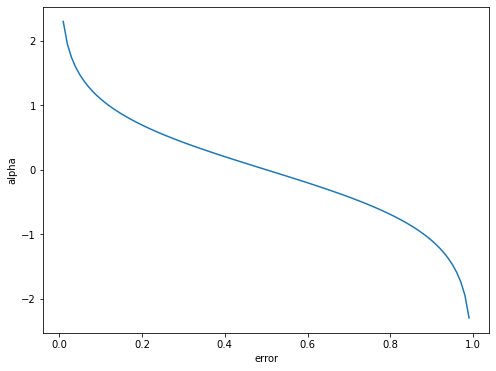

In [52]:
import numpy as np
import matplotlib.pyplot as plt
alpha = lambda x: 0.5 * np.log((1.0-x)/x)
error = np.arange(0.01, 1.0, 0.01)

plt.figure(figsize = (8,6))
plt.xlabel('error')
plt.ylabel('alpha')
plt.plot(error,alpha(error))
plt.show()

In [53]:
# error = 0.5, alpha = 0
# error < 0.5, alpha > 0 
# error > 0.5, alpha < 0  --> we can flip the error and decision, i.e., error=1-error, label=-label

In [66]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(n_samples=10, n_features=2, centers=2, cluster_std=5.05, random_state=10)
print(y)
y[y == 0] = -1
print(y)
print(X)


[0 1 1 1 0 1 0 0 0 1]
[-1  1  1  1 -1  1 -1 -1 -1  1]
[[  8.56415953 -13.22139309]
 [  3.82754686   7.2240226 ]
 [ 10.16987656  -0.47693702]
 [ -3.06687647   5.65851889]
 [ -2.37785861  -9.62729945]
 [ -2.20061694  10.16886174]
 [  6.76724637  -9.03679096]
 [  5.44808459 -10.46669208]
 [  7.61319512  -3.50962228]
 [ -7.31456312  -3.82795244]]


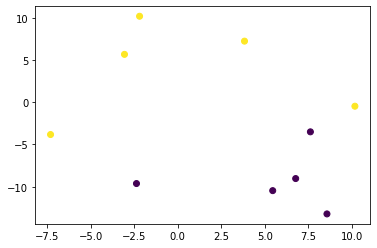

In [55]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

In [56]:
X_column=X
print(X_column)

[[  8.56415953 -13.22139309]
 [  3.82754686   7.2240226 ]
 [ 10.16987656  -0.47693702]
 [ -3.06687647   5.65851889]
 [ -2.37785861  -9.62729945]
 [ -2.20061694  10.16886174]
 [  6.76724637  -9.03679096]
 [  5.44808459 -10.46669208]
 [  7.61319512  -3.50962228]
 [ -7.31456312  -3.82795244]]


In [57]:
thresholds = np.unique(X_column)
print(thresholds)

[-13.22139309 -10.46669208  -9.62729945  -9.03679096  -7.31456312
  -3.82795244  -3.50962228  -3.06687647  -2.37785861  -2.20061694
  -0.47693702   3.82754686   5.44808459   5.65851889   6.76724637
   7.2240226    7.61319512   8.56415953  10.16886174  10.16987656]


In [59]:
polarity = 1

In [69]:
n_samples=10
n_features=2
clfs = []
w = np.full(n_samples, (1 / n_samples))
print('w =',w)
min_error = float("inf")
feature_i = 0
X_column = X[:, feature_i]
print('feature_i=',feature_i,',X_column=',X_column)
thresholds = np.unique(X_column)
print('thresholds=',thresholds)

w = [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
feature_i= 0 ,X_column= [ 8.56415953  3.82754686 10.16987656 -3.06687647 -2.37785861 -2.20061694
  6.76724637  5.44808459  7.61319512 -7.31456312]
thresholds= [-7.31456312 -3.06687647 -2.37785861 -2.20061694  3.82754686  5.44808459
  6.76724637  7.61319512  8.56415953 10.16987656]


In [61]:
print('y=',y)
for threshold in thresholds:
    p = 1     # predict with polarity 1
    predictions = np.ones(n_samples)
    predictions[X_column < threshold] = -1
    print('threshold=',threshold,',predictions=',predictions)
    # Error = sum of weights of misclassified samples
    misclassified = w[y != predictions]
    print('y != predictions',y != predictions)
    print('misclassified=w[y != predictions]=',misclassified)
    error = sum(misclassified)
    print('error=sum(misclassified)=', error)
    if error > 0.5:
        error = 1 - error
        print('error=1-error', error)
        p = -1
        print('polarity=',p)

y= [-1  1  1  1 -1  1 -1 -1 -1  1]
threshold= -7.314563118796922 ,predictions= [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
y != predictions [ True False False False  True False  True  True  True False]
misclassified=w[y != predictions]= [0.1 0.1 0.1 0.1 0.1]
error=sum(misclassified)= 0.5
threshold= -3.0668764712212644 ,predictions= [ 1.  1.  1.  1.  1.  1.  1.  1.  1. -1.]
y != predictions [ True False False False  True False  True  True  True  True]
misclassified=w[y != predictions]= [0.1 0.1 0.1 0.1 0.1 0.1]
error=sum(misclassified)= 0.6
error=1-error 0.4
polarity= -1
threshold= -2.3778586098269843 ,predictions= [ 1.  1.  1. -1.  1.  1.  1.  1.  1. -1.]
y != predictions [ True False False  True  True False  True  True  True  True]
misclassified=w[y != predictions]= [0.1 0.1 0.1 0.1 0.1 0.1 0.1]
error=sum(misclassified)= 0.7
error=1-error 0.30000000000000004
polarity= -1
threshold= -2.2006169375841464 ,predictions= [ 1.  1.  1. -1. -1.  1.  1.  1.  1. -1.]
y != predictions [ True False False  Tru

In [74]:
clf = DecisionStump()
n_samples=10
n_features=2
clfs = []
w = np.full(n_samples, (1 / n_samples))
min_error = float("inf")
for feature_i in range(n_features):
    X_column = X[:, feature_i]
    thresholds = np.unique(X_column)
    for threshold in thresholds:
        # predict with polarity 1
        p = 1
        predictions = np.ones(n_samples)
        predictions[X_column < threshold] = -1
        # Error = sum of weights of misclassified samples
        misclassified = w[y != predictions]
        error = sum(misclassified)
        if error > 0.5:
            error = 1 - error
            p = -1
        # store the best configuration
        if error < min_error:
            clf.polarity = p
            clf.threshold = threshold
            clf.feature_idx = feature_i
            min_error = error
            print('min_error=',error)
            
# calculate alpha
EPS = 1e-10
clf.alpha = 0.5 * np.log((1.0 - min_error + EPS) / (min_error + EPS))
print('clf.alpha=',clf.alpha)

# calculate predictions and update weights
predictions = clf.predict(X)
print('clf.predict(X)=',predictions)

w *= np.exp(-clf.alpha * y * predictions)
# Normalize to one
w /= np.sum(w)
print('w=',w)

# Save classifier
clfs.append(clf)

min_error= 0.5
min_error= 0.4
min_error= 0.30000000000000004
min_error= 0.20000000000000007
min_error= 0.2
min_error= 0.1
clf.alpha= 1.0986122882236653
clf.predict(X)= [-1.  1.  1.  1. -1.  1. -1. -1.  1.  1.]
w= [0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.5        0.05555556]


In [75]:
clf = DecisionStump()
for feature_i in range(n_features):
    X_column = X[:, feature_i]
    thresholds = np.unique(X_column)
    for threshold in thresholds:
        # predict with polarity 1
        p = 1
        predictions = np.ones(n_samples)
        predictions[X_column < threshold] = -1
        # Error = sum of weights of misclassified samples
        misclassified = w[y != predictions]
        error = sum(misclassified)
        if error > 0.5:
            error = 1 - error
            p = -1
        # store the best configuration
        if error < min_error:
            clf.polarity = p
            clf.threshold = threshold
            clf.feature_idx = feature_i
            min_error = error
            print('min_error=',error)
            
# calculate alpha
EPS = 1e-10
clf.alpha = 0.5 * np.log((1.0 - min_error + EPS) / (min_error + EPS))
print('clf.alpha=',clf.alpha)

# calculate predictions and update weights
predictions = clf.predict(X)
print('clf.predict(X)=',predictions)

w *= np.exp(-clf.alpha * y * predictions)
# Normalize to one
w /= np.sum(w)
print('w=',w)

# Save classifier
clfs.append(clf)

min_error= 0.05555555558024692
clf.alpha= 1.416606670945755
clf.predict(X)= [-1.  1.  1.  1. -1.  1. -1. -1. -1. -1.]
w= [0.02941176 0.02941176 0.02941176 0.02941176 0.02941176 0.02941176
 0.02941176 0.02941176 0.26470588 0.5       ]
